# Módulo 10: Descritiva II - Análise descritiva para resposta contínua

# Exercício 1

Trabalharemos com a base de dados "PREVISAO_DE_RENDA.CSV" para o desenvolvimento das habilidades em **CORRELAÇÃO**.

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
# importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('PREVISAO_DE_RENDA.csv')
df_previsao = pd.DataFrame(arquivo)


# informações sobre os dados

df_previsao.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [3]:
# separando dados númericos para consulta e colunas dispensáveis

df_consulta = df_previsao.select_dtypes(exclude=['object'])
df_consulta = df_consulta.drop('Unnamed: 0', axis=1, errors='ignore')
df_consulta = df_consulta.drop('index', axis=1, errors='ignore')

df_consulta.columns

Index(['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [4]:
# correlação entre as variáveis

df_consulta.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


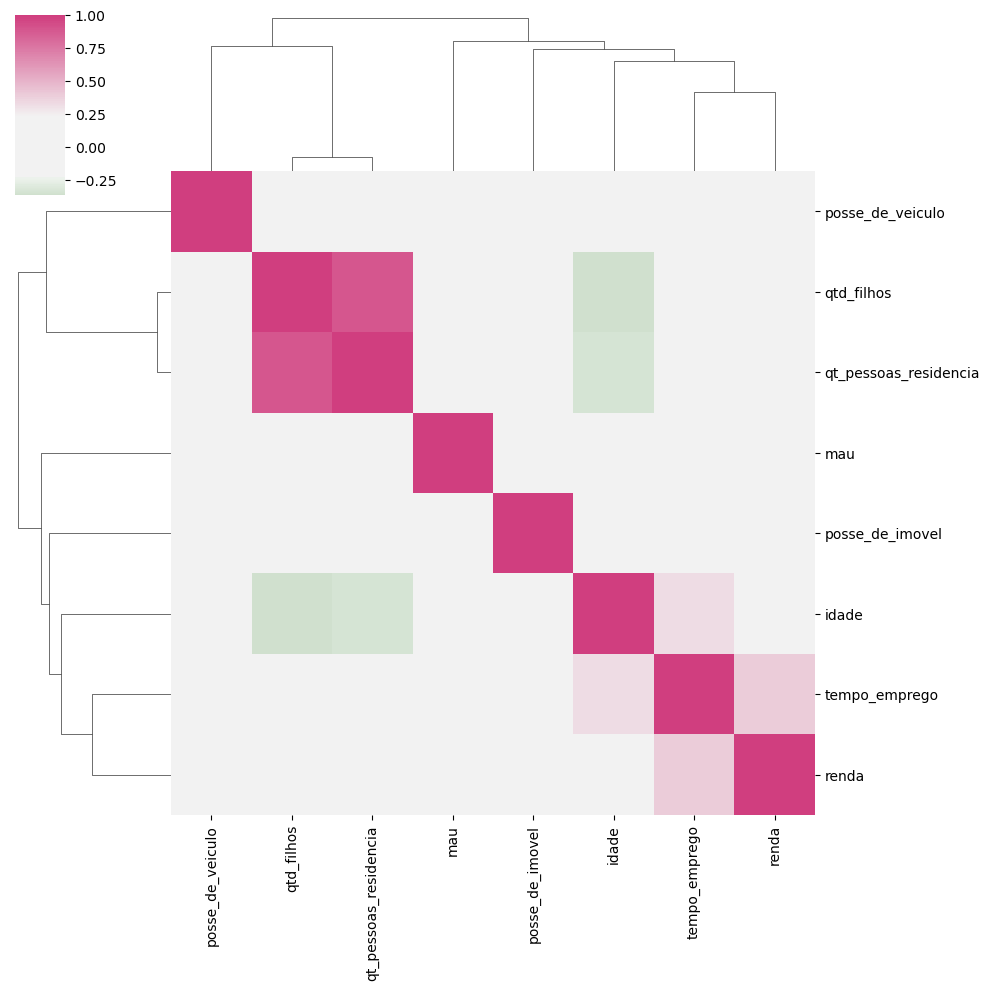

In [5]:
# matriz de correlação de variáveis

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_consulta.corr(), figsize=(10, 10), center = 0, cmap=cmap)

A matriz de correlação evidencia que de forma geral as variáveis não têm relação. Há exceções:
- que se trata das variáveis **qtd_filhos** e **qt_pessoas_residencia**;
- há também correlação entre as variáveis **idade** e **tempo_emprego**;
- e também **tempo_emprego** e **renda**.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

C:\Users\Cristina Notebook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Cristina Notebook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


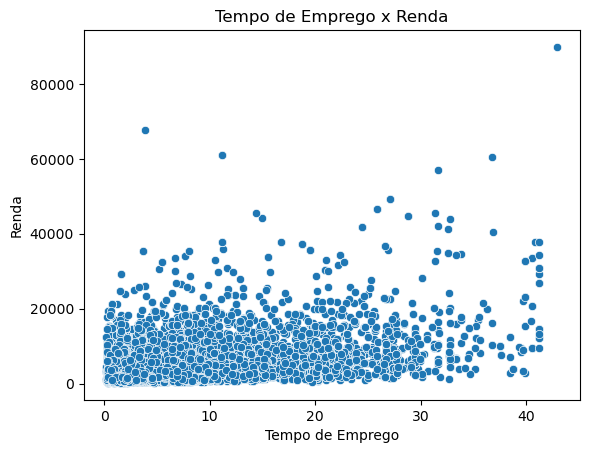

In [6]:
sns.scatterplot(x = df_consulta['tempo_emprego'], y = df_consulta['renda'])
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Tempo de Emprego x Renda')
plt.show()



3) Na sua opinião, há outliers na variável renda?
- Resposta: Sim, há alguns outliers. Até **25** anos de trabalho a renda evolui para no máximo **20000**. Vemos poucas pessoas passam dos **20000** de renda. Desse muitos chegam ao patamar de **40000**. Porém, pouquíssimas pessoas conseguem renda acima de **40000**. Os dados mostram que há pelo menos uma pessoa que ultrapassou a marca de **80000** (outlier máximo). 

4) Calcule o logaritmo da variável renda e repita a sequência de análise

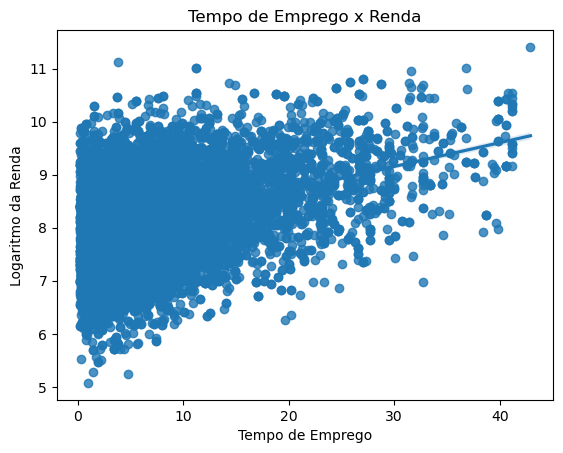

In [7]:
# aplicação  da função "np.log" na base de dados "df_consulta"

df_consulta_log = df_consulta.copy()
df_consulta_log['log_y'] = np.log(df_consulta_log['renda'])

sns.regplot(x='tempo_emprego', y='log_y', data = df_consulta_log)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Logaritmo da Renda')
plt.title('Tempo de Emprego x Renda')
plt.show()



4a) Repita a sequência de análise
- **Resposta:** com a aplicação da função logaritmo houve uma "suavização" dos outliers. As diferenças notadas no gráfico não parecem tão discrepantes antes do uso da função. Neste sentido o gráfico fica mais uniforme e não evidencia pontos fora da curva.


5) A aplicação do LOG você acha que melhorou ou piorou a análise?
- **Resposta:** A aplicação do LOG evidenciou que na verdade o range da renda fica entre **6000** e **10000**. Ou seja, a maioria das rendas giram en torno desses valores.